In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv('Logistic_X_Train.csv')
Y_train = pd.read_csv('Logistic_Y_Train.csv')
X_test = pd.read_csv('Logistic_X_Test.csv')
print(X_train.shape , Y_train.shape , X_test.shape)

(3000, 3) (3000, 1) (1000, 3)


In [3]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
Y_train.head()

,label
0,1
1,1
2,1
3,0
4,0


In [5]:
XT = np.array(X_train)
Xt = np.array(X_test)
YT = np.array(Y_train)

In [6]:
print(XT.shape,Xt.shape,YT.shape)

(3000, 3) (1000, 3) (3000, 1)


In [7]:
x_mean = np.mean(XT,axis=0)
x_std = np.std(XT,axis=0)

XT = (XT-x_mean)/x_std
Xt = (Xt-x_mean)/x_std

print(XT.shape,Xt.shape)

(3000, 3) (1000, 3)


In [8]:
ones = np.ones((XT.shape[0],1))
XT = np.hstack((ones,XT))
print(Xt.shape)

(1000, 3)


In [9]:
print(XT.shape)

(3000, 4)


In [10]:
ones = np.ones((Xt.shape[0],1))
Xt = np.hstack((ones,Xt))
print(Xt.shape)

(1000, 4)


In [11]:
XT[:3,:]

array([[ 1.        , -0.93471307, -0.24439694, -0.46140414],
       [ 1.        , -0.7823013 , -0.19327286, -1.08586573],
       [ 1.        , -0.46707053,  0.56681072, -1.17534766]])

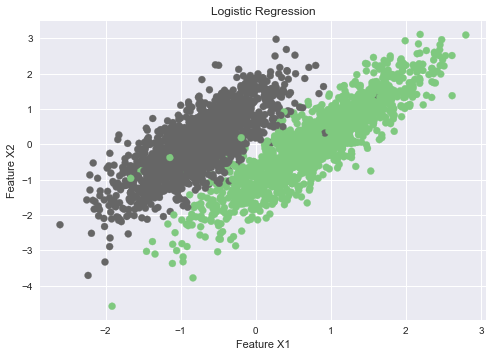

In [12]:
plt.style.use('seaborn')
plt.scatter(XT[: , 1] , XT[: , 2] , c=YT,cmap=plt.cm.Accent)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Logistic Regression')
plt.show()

In [13]:
def sigmoid(x):
    return (1.0  / (1.0 + np.exp(-x)))

def hypothesis(X,theta):
    hi = sigmoid(np.dot(X,theta))
    return hi

def error(X,y,theta):
    m,n = X.shape
    hi = hypothesis(X,theta)
    error = -1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
    return error

def gradient(X,y,theta):
    m,n = X.shape
    hi = hypothesis(X,theta)
    grad = - np.dot(X.T,(y-hi))
    return grad/m

def gradient_descent(X,y,lr=0.1,max_iters=500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_iters):
        hi = hypothesis(X,theta)
        grad = gradient(X,y,theta)
        e = error(X,y,theta)
        error_list.append(e)
        
        theta = theta - lr*grad
        
    return theta,error_list   


In [14]:
YT = YT.reshape((-1,1))
print(YT.shape)

(3000, 1)


In [15]:
import time
start = time.time()
theta,error_list = gradient_descent(XT,YT)
end = time.time()
print('successfully executed in ',end-start)

successfully executed in  0.49930858612060547


In [16]:
theta

array([[-0.34767648],
       [-2.54073799],
       [ 1.38266256],
       [-2.30256859]])

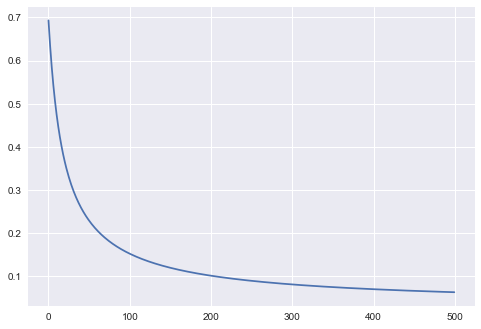

In [17]:
plt.plot(error_list)
plt.show()

In [18]:
def pred(X,theta):
    hi = hypothesis(X,theta)
    output = np.zeros(hi.shape)
    output[hi>=0.5]  = 1.0
    output = output.astype('int')
    return output

In [19]:
XT_preds = pred(XT,theta)
Xt_preds = pred(Xt,theta)

In [20]:
print(Xt_preds.shape,XT_preds.shape)

(1000, 1) (3000, 1)


In [21]:
def accuracy(actual,predicted):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    score = np.sum(actual == predicted)/actual.shape[0]
    return score*100

In [22]:
accuracy(YT,XT_preds)

99.26666666666667

In [23]:
Xt_preds[:3,:]

array([[1],
       [1],
       [0]])

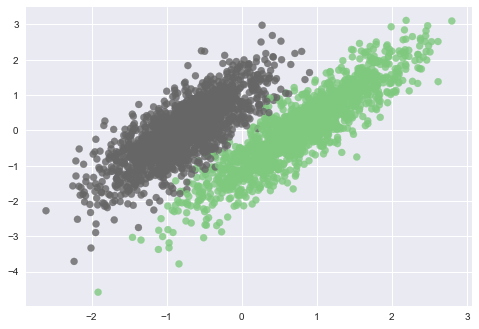

In [24]:
plt.scatter(XT[: , 1],XT[: , 2] ,c=XT_preds,cmap=plt.cm.Accent,alpha=0.8)

plt.show()

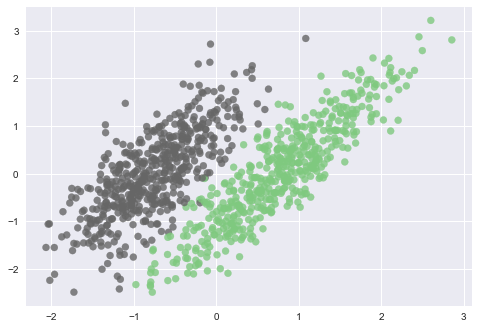

In [25]:
plt.scatter(Xt[: , 1],Xt[: , 2] ,c=Xt_preds,cmap=plt.cm.Accent,alpha=0.8)

plt.show()

In [26]:
dfX = pd.DataFrame(XT_preds)
dfx = pd.DataFrame(Xt_preds)

In [27]:
dfx.columns = ['Label']

In [28]:
dfx

,Label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [29]:
dfx.to_csv('Logistic_Y_test.csv',index=False)